# Iris dataset analysis

In the following cells, an EDA analysis was performed and then the modeling of the dataset. The objective was to compare the performance of different classification models to predict the flower species.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

## READ FILE

In [2]:
df = pd.read_csv("iris_data.csv")
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [7]:
df.value_counts("class")

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Visualizations

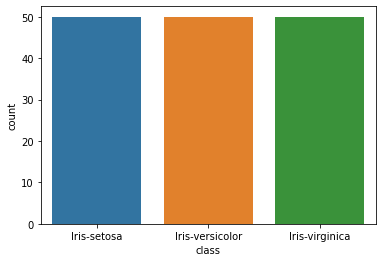

In [8]:
sns.countplot(x='class', data=df)
plt.show()

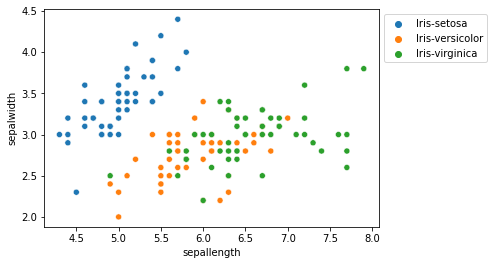

In [9]:
# scatter plot of variables sepal length and sepal width
sns.scatterplot(x='sepallength', y='sepalwidth',
                hue='class', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

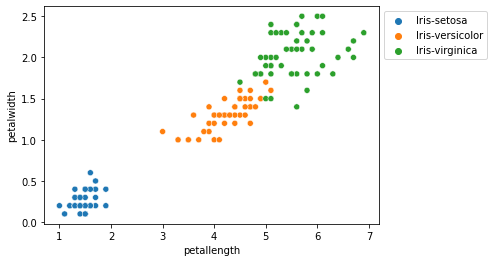

In [10]:
# scatter plot of variables pepal length and pepal width
sns.scatterplot(x='petallength', y='petalwidth',
                hue='class', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

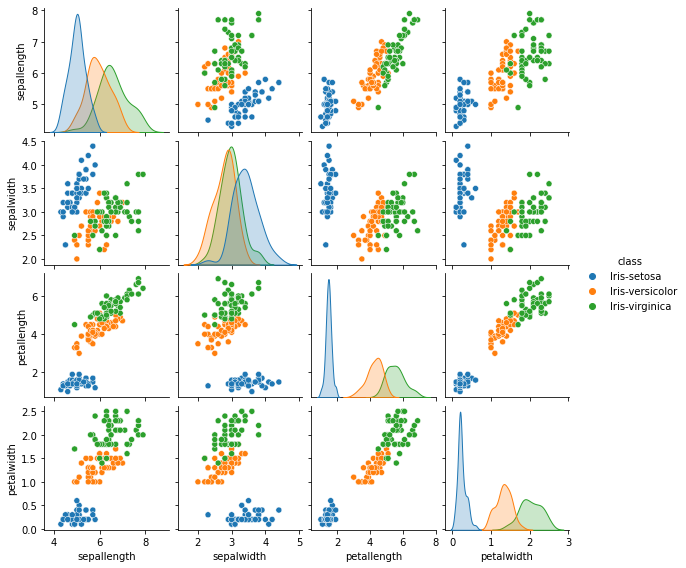

In [11]:
# scatter plot between all variables
sns.pairplot(df, hue='class', height=2)

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

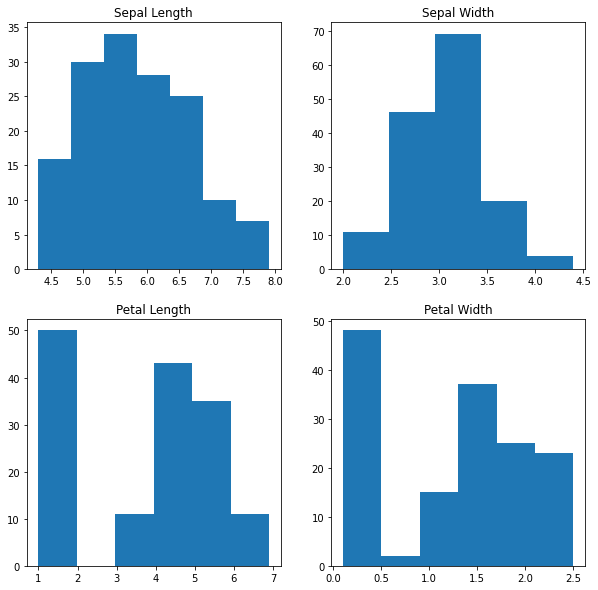

In [12]:
# histograms
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepallength'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepalwidth'], bins=5)
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petallength'], bins=6)
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petalwidth'], bins=6)

In [13]:
# Correlations
df.corr(method='pearson')

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


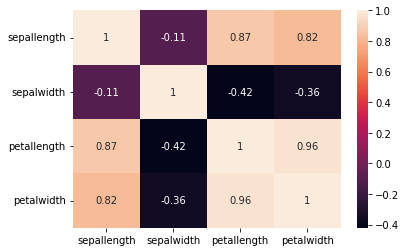

In [14]:
# correlations visualization
sns.heatmap(df.corr(method='pearson'), annot = True)
plt.show()

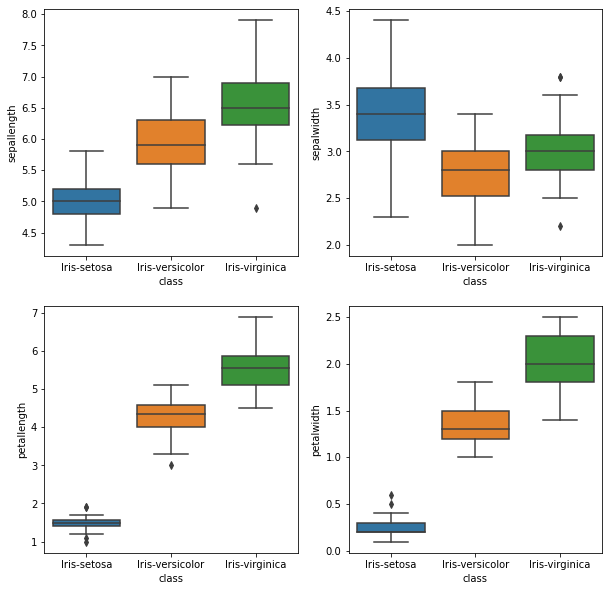

In [15]:
# box plots
def graph(y):
    sns.boxplot(x="class", y=y, data=df)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified grid position
plt.subplot(221)
graph('sepallength')
 
plt.subplot(222)
graph('sepalwidth')
 
plt.subplot(223)
graph('petallength')
 
plt.subplot(224)
graph('petalwidth')

plt.show()

In [16]:
# removing outliers

def remove_outliers(column_name, data):
    Q1 = np.percentile(data[column_name], 25,
                interpolation = 'midpoint')
 
    Q3 = np.percentile(data[column_name], 75,
                    interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    # Upper bound
    upper = np.where(data[column_name] >= (Q3+1.5*IQR))
    print("upper bound: ", upper)
    # Lower bound
    lower = np.where(data[column_name] <= (Q1-1.5*IQR))
    print("lower bound:", lower)
    # Removing the Outliers
    data.drop(upper[0], inplace = True)
    data.drop(lower[0], inplace = True)
    sns.boxplot(x=column_name, data=data)

Old Shape:  (150, 5)
column name:  sepallength
upper bound:  (array([], dtype=int64),)
lower bound: (array([], dtype=int64),)
column name:  sepalwidth
upper bound:  (array([15, 32, 33], dtype=int64),)
lower bound: (array([60], dtype=int64),)
column name:  petallength
upper bound:  (array([], dtype=int64),)
lower bound: (array([], dtype=int64),)
column name:  petalwidth
upper bound:  (array([], dtype=int64),)
lower bound: (array([], dtype=int64),)
New Shape:  (146, 5)


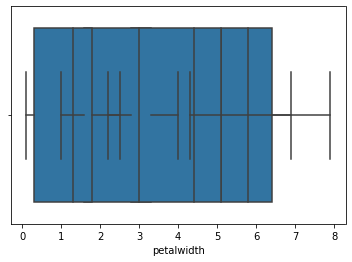

In [17]:
column_names = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

data = df.copy()
print("Old Shape: ", data.shape)

for column_name in column_names:
    print("column name: ", column_name)
    remove_outliers(column_name, data)

print("New Shape: ", data.shape)

In [18]:
df_cleaned = data.copy()
df_cleaned.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## PCA

In [19]:
# label encoding 
df_cleaned['class'].replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2}, inplace=True)
df_cleaned

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


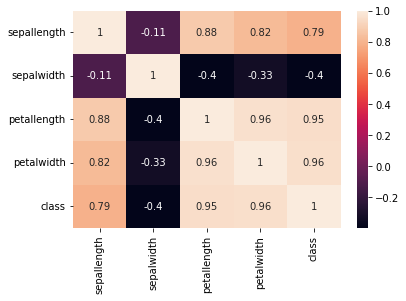

In [20]:
# new correlation plot with target variable
sns.heatmap(df_cleaned.corr(method='pearson'), annot = True)
plt.show()

According to the results, the sepal width variable has a negative correlation with the target variable, and less intense than the rest of the variables.

In [21]:
# Distribute in X and y
X = df_cleaned.drop(['class'], axis=1)
y = df_cleaned['class']

In [22]:
# standarization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# first PCA for getting the number of components
pca = PCA()
X_new = pca.fit_transform(X_scaled)

In [24]:
explained_variance=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print("Accumulated percentage of variation of each component: ", explained_variance)

Accumulated percentage of variation of each component:  [ 72.6  95.7  99.5 100. ]


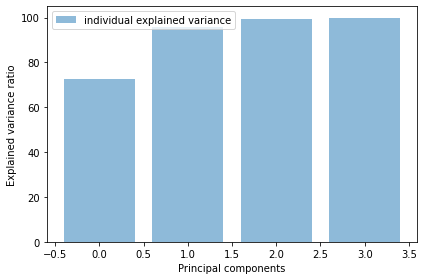

In [25]:
# components plot
plt.figure(figsize=(6, 4))

plt.bar(range(4), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

I will work with the first three components

In [26]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X_scaled)

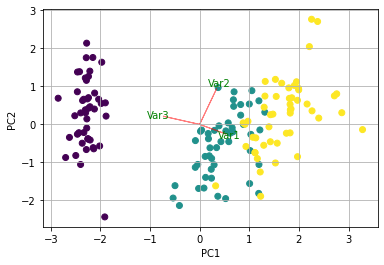

In [27]:
# visualization of 2 componentes
def pca_plot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()

pca_plot(X_new, pca.components_)

In [28]:
# scores
df_pca_scores = pd.DataFrame(pca.components_, columns=list(X.columns))
df_pca_scores

,sepallength,sepalwidth,petallength,petalwidth
0,0.528018,-0.250895,0.581815,0.565455
1,0.341393,0.936805,0.023403,0.072794
2,-0.731134,0.213782,0.141200,0.632300


In [29]:
# Most relevant variables in each component
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = list(X.columns)
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_features = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
print(most_important_features)

{'PC0': 'petallength', 'PC1': 'sepalwidth', 'PC2': 'sepallength'}


The output indicates that I should work with the variables
petallength, sepalwidth, and sepallength.
To test how different models perform, I'm going to create
4 data frames:
- X_pca_features: petallength, sepalwidth, sepallength
- X_corr_features: sepallength, petallength, petalwidth
- X_full_features: sepallength, sepalwidth, petallength, petalwidth
- X_full_features_with_outliers: sepallength, sepalwidth, petallength, petalwidth (original dataframe)

In [30]:
df_cleaned.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df_cleaned.shape

(146, 5)

In [32]:
df_pca_features = df_cleaned[['sepallength', 'sepalwidth', 'petallength', 'class']]
df_pca_features

,sepallength,sepalwidth,petallength,class
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
...,...,...,...,...
145,6.7,3.0,5.2,2
146,6.3,2.5,5.0,2
147,6.5,3.0,5.2,2
148,6.2,3.4,5.4,2


In [33]:
df_corr_features = df_cleaned[['sepallength', 'petallength', 'petallength', 'class']]
df_corr_features

,sepallength,petallength,petallength,class
0,5.1,1.4,1.4,0
1,4.9,1.4,1.4,0
2,4.7,1.3,1.3,0
3,4.6,1.5,1.5,0
4,5.0,1.4,1.4,0
...,...,...,...,...
145,6.7,5.2,5.2,2
146,6.3,5.0,5.0,2
147,6.5,5.2,5.2,2
148,6.2,5.4,5.4,2


In [34]:
df_full_features = df_cleaned.copy()
df_full_features

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Modeling

Most used models for classification problems in machine learning:
1. Logistic Regression
2. Naive Bayes
3. K-Nearest Neighbors
4. Decision Tree
5. Support Vector Machines

Some useful links:
- https://monkeylearn.com/blog/classification-algorithms/
- https://data-flair.training/blogs/machine-learning-classification-algorithms/

Some inspirational links:
- https://www.kaggle.com/adityabhat24/iris-data-analysis-and-machine-learning-python
- https://www.c-sharpcorner.com/article/a-first-machine-learning-project-in-python-with-iris-dataset/
- https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset

In [35]:
# dataframe for saving results
column_names = ['Model name', 'dataset', 'accuracy']
results_df = pd.DataFrame(columns=column_names)
results_df

,Model name,dataset,accuracy


In [36]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
models = {
    'logistic_regression': LogisticRegression(),
    'naive_bayes' : GaussianNB(),
    'svc ': SVC(),
    'knn': KNeighborsClassifier(n_neighbors=8),
    'decision_tree': DecisionTreeClassifier()
}

In [38]:
datasets = {
    'pca_features': df_pca_features,
    'corr_features': df_corr_features,
    'full_features': df_full_features,
    'full_outliers_features': df
    
}

In [39]:
class ClassificationResults():
    def __init__(self, df):
        self.results = df
        
    def save_results(self, model_name, dataset_name, accuracy_score):
        new_row = pd.Series([model_name, dataset_name, accuracy_score], index=self.results.columns)
        self.results = self.results.append(new_row, ignore_index=True)
        
    def print_results(self):
        print(self.results)

In [40]:
results = ClassificationResults(results_df)

In [41]:
def train_a_model(model_instance, dataset):
    classifier= model_instance
            
    # Separating the data into dependent and independent variables
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    # Summary of the predictions made by the classifier
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Accuracy score
    accuracy = accuracy_score(y_pred,y_test)
    print('Accuracy: {}'.format(accuracy))
    return accuracy


In [42]:
# helper function for modeling all dataframes with all models
def modeling(datasets, models, results):
    for dataset, df in datasets.items():
        print("Using dataset {} for modeling".format(dataset))
        for model, model_instance in models.items():
            print("{} model".format(model))
            model_acuracy = train_a_model(model_instance, df)
            results.save_results(model, dataset, model_acuracy)

In [43]:
modeling(datasets, models, results)

Using dataset pca_features for modeling
logistic_regression model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]
Accuracy: 0.9666666666666667
naive_bayes model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91        10
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[[11  0  0]
 [ 0 10  0]
 [ 0  2  7]]
Accuracy: 0.9333333333333333
svc  model
           

C:\Users\vikim\anaconda3\envs\practicas3-7\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [44]:
# finally, print results
results.print_results()

             Model name                 dataset  accuracy
0   logistic_regression            pca_features  0.966667
1           naive_bayes            pca_features  0.933333
2                  svc             pca_features  0.966667
3                   knn            pca_features  0.933333
4         decision_tree            pca_features  0.833333
5   logistic_regression           corr_features  0.966667
6           naive_bayes           corr_features  0.966667
7                  svc            corr_features  0.966667
8                   knn           corr_features  1.000000
9         decision_tree           corr_features  0.833333
10  logistic_regression           full_features  1.000000
11          naive_bayes           full_features  0.966667
12                 svc            full_features  1.000000
13                  knn           full_features  1.000000
14        decision_tree           full_features  0.933333
15  logistic_regression  full_outliers_features  1.000000
16          na